<a href="https://colab.research.google.com/github/CrisGiacomazzi/CNN-Lung-Project/blob/main/Lung_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path to the uploaded zip file
zip_path = '/content/drive/MyDrive/Portfolio/CNN image/lung-disease-dataset.zip'
extract_to = '/mnt/data/lung-disease-dataset/'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

extracted_folders = os.listdir(extract_to + "Lung X-Ray Image/Lung X-Ray Image")
print("Folders extracted to:", extract_to)
print(extracted_folders)




Folders extracted to: /mnt/data/lung-disease-dataset/
['Viral Pneumonia', 'Normal', 'Lung_Opacity']


Prepare the dataset

In [4]:
# Set the directory containing the dataset
# data_dir = extract_to + "Lung X-Ray Image"

# Set the directory containing the dataset
data_dir = os.path.join(extract_to, "Lung X-Ray Image/Lung X-Ray Image")


# Prepare ImageDataGenerator for training and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training and validation generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2780 images belonging to 3 classes.
Found 695 images belonging to 3 classes.


Define the CNN model

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer matches number of classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.6231 - loss: 0.8142 - val_accuracy: 0.8158 - val_loss: 0.4198
Epoch 2/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8355 - loss: 0.4120 - val_accuracy: 0.8360 - val_loss: 0.3842
Epoch 3/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8747 - loss: 0.3188 - val_accuracy: 0.8691 - val_loss: 0.3267
Epoch 4/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8718 - loss: 0.3134 - val_accuracy: 0.8748 - val_loss: 0.3086
Epoch 5/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9017 - loss: 0.2488 - val_accuracy: 0.8518 - val_loss: 0.3375
Epoch 6/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9036 - loss: 0.2239 - val_accuracy: 0.8835 - val_loss: 0.2774
Epoch 7/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9347 - loss: 0.1772 - val_accuracy: 0.8576 - val_loss: 0.3194
Epoch 8/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.9324 - loss: 0.1719 - val_accuracy: 0.8892 - val_loss: 0.

Save the model

In [7]:
model_path = '/mnt/data/cnn_model_lung_disease.h5'
model.save(model_path)
print(f"Model saved at: {model_path}")


Model saved at: /mnt/data/cnn_model_lung_disease.h5


Evaluate the model

In [8]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 443ms/step - accuracy: 0.9003 - loss: 0.4191
Validation Loss: 0.5137847065925598
Validation Accuracy: 0.8820143938064575


#Confusion Matrix

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Predictions

In [10]:
# Get true labels and predicted labels for the validation data
val_generator.reset()  # Ensure the generator starts from the beginning

# Predict probabilities for validation data
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 470ms/step


Compute Matrix

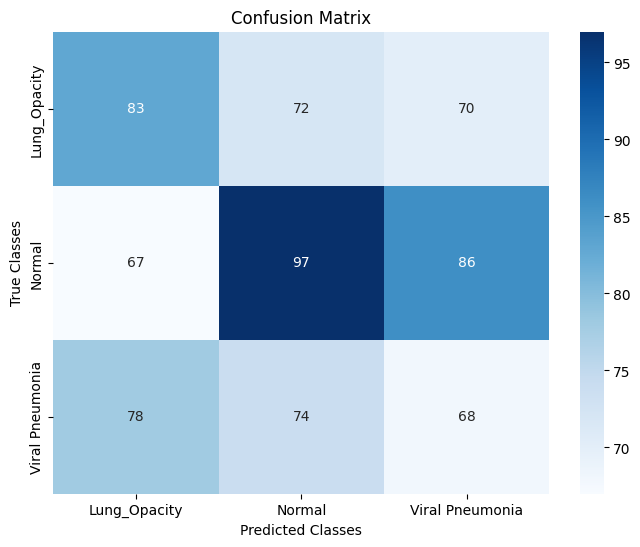

In [11]:
# Create the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

Report

In [12]:
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Classification Report:
                 precision    recall  f1-score   support

   Lung_Opacity       0.36      0.37      0.37       225
         Normal       0.40      0.39      0.39       250
Viral Pneumonia       0.30      0.31      0.31       220

       accuracy                           0.36       695
      macro avg       0.36      0.36      0.36       695
   weighted avg       0.36      0.36      0.36       695

